<a href="https://colab.research.google.com/github/Jabed-Hasan/python/blob/main/kmensUsingOwnDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
df=pd.read_csv('/content/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.drop(['PassengerId','Name','Ticket','Cabin','Embarked'],axis=1,inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [ ]:
df.dropna(inplace=True, axis=0)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [ ]:
y=df['Survived']
df=df.drop(['Survived'],axis=1)

In [ ]:
df["Label"]=pd.cut(df["Age"], bins=[0,20,40,100], labels=["Young","Adult","Senior"])
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Label
0,3,1,22.0,1,0,7.2500,Adult
1,1,0,38.0,1,0,71.2833,Adult
2,3,0,26.0,0,0,7.9250,Adult
3,1,0,35.0,1,0,53.1000,Adult
4,3,1,35.0,0,0,8.0500,Adult


In [ ]:
from sklearn import preprocessing

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df['Sex']= label_encoder.fit_transform(df['Sex'])
df['Label']= label_encoder.fit_transform(df['Label'])
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Label
0,3,1,22.0,1,0,7.2500,0
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,0
3,1,0,35.0,1,0,53.1000,0
4,3,1,35.0,0,0,8.0500,0


In [ ]:
x=df

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import sklearn.metrics as sm




In [ ]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Choose 2 clusters (because Titanic survival is binary: 0 or 1)
model = KMeans(n_clusters=2)
model.fit(x_train, y_train)


y_pred = model.predict(x_test)


In [ ]:
print(y_test, y_pred)

149    0
407    1
53     1
369    1
818    0
      ..
819    0
164    0
363    0
56     1
136    1
Name: Survived, Length: 143, dtype: int64 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
accuracy= accuracy_score(y_test, y_pred)
print(accuracy)

0.6433566433566433


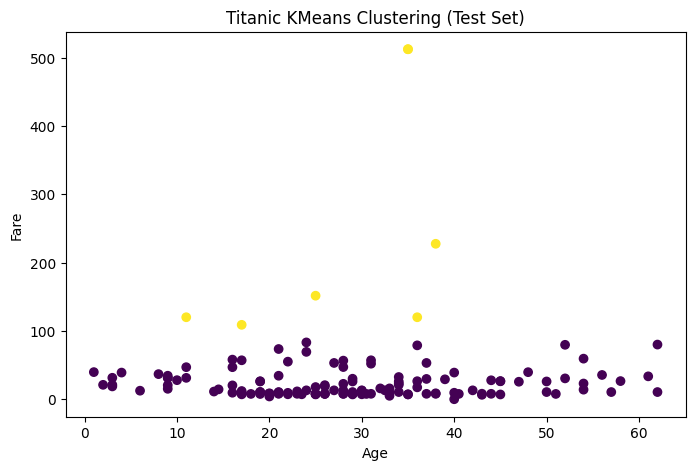

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(x_test['Age'], x_test['Fare'], c=y_pred, cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Titanic KMeans Clustering (Test Set)')
plt.show()
